In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions

In [7]:
def random_x(Lx,Ly,N):
    return np.array([[Lx,Ly]]).T*np.random.rand(2,N)

In [8]:
def random_seq_x(Lx,Ly,N,r):
    max_tries=N
    box=np.array([[Lx,Ly]]).T
    L=np.sqrt(Lx**2+Ly**2)
    infty=L+2*r
    X=infty*np.ones((2,N))
    for n in range(N):
        for run in range(max_tries):
            x=box*np.random.rand(2,1)
            
            if not np.any(np.linalg.norm(X-x,axis=0) < r):
                X[:,n]=x.reshape((2))
                break
                
            if run == max_tries-1:
                raise Exception('max_tries reached')
    return X
        

In [9]:
def ordered_x(Lx,Ly,N):
    r=np.sqrt(Lx*Ly/N)
    x = np.arange(0,Lx+r,r)
    y = np.arange(0,Ly+r,r)
    Xgrid,Ygrid = np.meshgrid(x, y)
    X = np.row_stack((Xgrid.ravel(),Ygrid.ravel()))
    return X

In [10]:
def pair_sub(X):
    N=X.shape[1]
    X1=X.reshape((1,2,N))
    X2=X.T.reshape((N,2,1))
    return X2-X1
def pair_dist(X):
    return np.linalg.norm(pair_sub(X),axis=1)

In [47]:
A=True*np.ones([3,7])
np.triu(A,1)

array([[0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.]])

In [372]:
def get_box_mask(X,Lx,Ly,box_x0,box_y0,box_x,box_y):
    tmp = (X <= np.array([[box_x0 + box_x],[Ly]])) & (X >= np.array([[box_x0 - box_x],[0]])) & \
        (X <= np.array([[Lx],[box_y0+box_y]])) & (X >= np.array([[0],[box_y0-box_y]])) 
    return tmp[0,:] & tmp[1,:]

def g(X,R,Lx,Ly):
    N=X.shape[1]
    X_R=pair_dist(X)
    dr=R[1]-R[0]

    box_x0 = Lx/2
    box_y0 = Ly/2
    box_x = Lx/50
    box_y = Ly/50
    box_mask = get_box_mask(X,Lx,Ly,box_x0,box_y0,box_x,box_y)
    
    N_reference = box_mask.sum()
    X_R_reduced = np.delete(X_R, np.argwhere(~box_mask), 0)

    g=np.zeros_like(R)
    for i in range(len(R)):
        r = R[i]
        X_R_sub_R = X_R_reduced - r
        X_R_in_R = (X_R_sub_R >= 0) & (X_R_sub_R < dr)
        
        # mask
        # X_R_in_R &= np.triu(np.ones_like(X_R_in_R),1)
        for j1 in range(X_R_reduced.shape[0]):
            for j2 in range(j1+1):
                X_R_in_R[j1,j2] = False
        
        g[i] = X_R_in_R.sum((0,1))

    # X_R_sub_R=(X_R.reshape(N,N,1) - R.reshape(1,1,R.shape[0]))
    # X_R_in_R = (X_R_sub_R < dr) & (X_R_sub_R >= 0)
    # g=X_R_in_R.sum((0,1))
    # g[0] -= N
    # g = 0.5*g
    g_normalized = g / N_reference / (2*np.pi*R*dr) / (N/(Lx*Ly))
    return g_normalized

# Simulation

## Random Placed Points

In [373]:
Lx=20
Ly=20
N=5000
np.random.seed(42)

In [374]:
L=np.sqrt(Lx**2+Ly**2)
bins=2000
R=np.linspace(0,L,bins)
dr=R[1]-R[0]

In [375]:
dr/Lx

0.0007074605114422687

In [376]:
X_random=random_x(Lx,Ly,N)

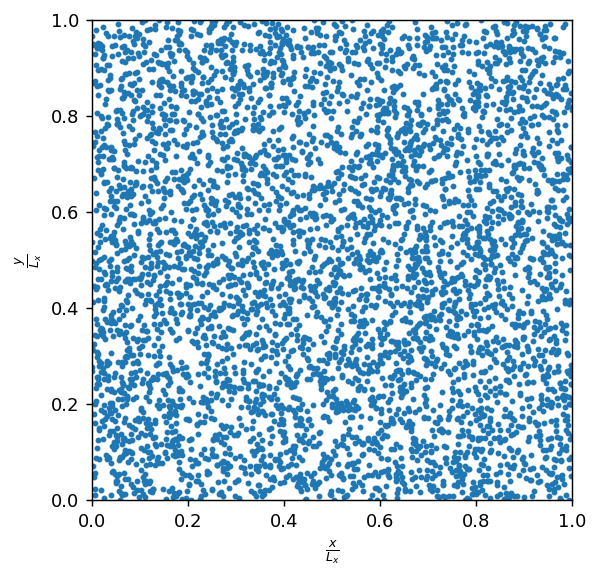

In [377]:
plt.figure(dpi=130)
plt.scatter(X_random[0,:]/Lx,X_random[1,:]/Ly,s=5)
plt.xlim((0,1))
plt.ylim((0,Ly/Lx))
plt.xlabel(r'$\frac{x}{L_x}$')
plt.ylabel(r'$\frac{y}{L_x}$')
plt.gca().set_aspect('equal')
plt.savefig('plots/config_random.png',bbox_inches='tight')

In [378]:
from time import time
st = time()
g_random = g(X_random,R,Lx,Ly)
print(time()-st)

0.7739427089691162


/tmp/ipykernel_25290/4150231984.py:39: RuntimeWarning: divide by zero encountered in divide
  g_normalized = g / N_reference / (2*np.pi*R*dr) / (N/(Lx*Ly))


Text(0.5, 0, 'r')

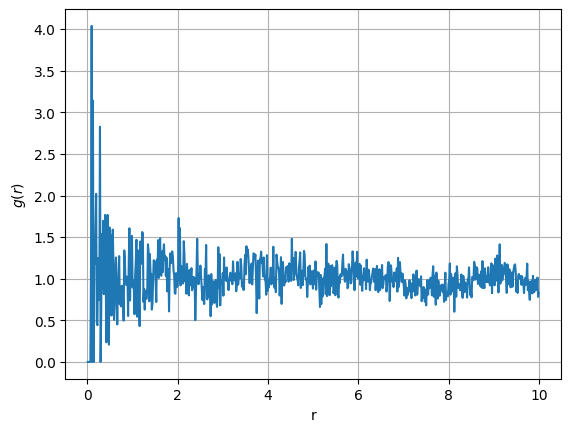

In [379]:
plt.figure(110)
plt.plot(R[R<Lx/2],g_random[R<Lx/2])
plt.grid()
plt.ylabel(r'$g\left(r\right)$')
plt.xlabel('r')

In [380]:
M=50
g_random_smooth = np.zeros_like(R)
for i in range(M):
    print(i)
    X_random=random_x(Lx,Ly,N)
    g_random = g(X_random,R,Lx,Ly)
    g_random_smooth += g_random
g_random_smooth /= M

0


/tmp/ipykernel_25290/4150231984.py:39: RuntimeWarning: divide by zero encountered in divide
  g_normalized = g / N_reference / (2*np.pi*R*dr) / (N/(Lx*Ly))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


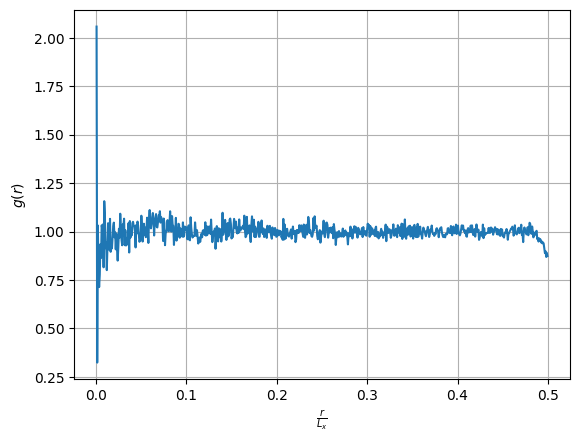

In [381]:
plt.figure(130)
plt.plot(R[R<Lx/2]/Lx,g_random_smooth[R<Lx/2])
plt.grid()
plt.ylabel(r'$g\left(r\right)$')
plt.xlabel(r'$\frac{r}{L_x}$')
plt.savefig('plots/g_smooth_random.png',bbox_inches='tight')
plt.show()

## Random Sequential Addition

In [349]:
Lx=20
Ly=20
N=2000
np.random.seed(42)

In [383]:
L=np.sqrt(Lx**2+Ly**2)
bins=1000
R=np.linspace(0,L,bins)
dr=R[1]-R[0]

In [385]:
dr/Lx

0.0014156291915646598

In [199]:
X_rand_seq = random_seq_x(Lx,Ly,N,0.35)

In [386]:
0.35/Lx

0.017499999999999998

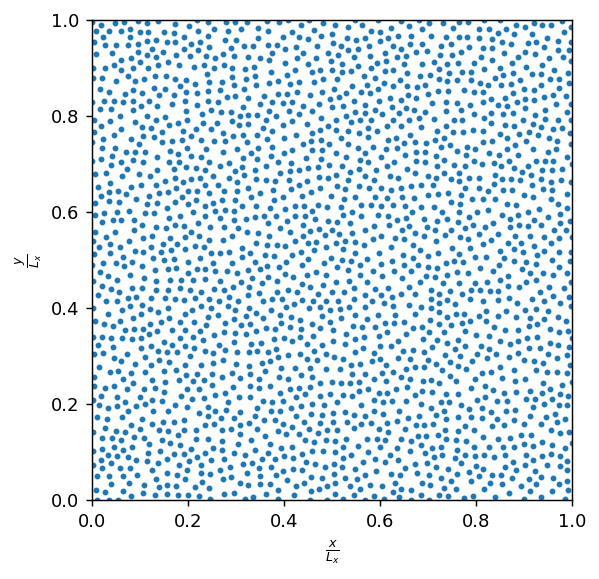

In [347]:
plt.figure(dpi=130)
plt.scatter(X_rand_seq[0,:]/Lx,X_rand_seq[1,:]/Ly,s=5)
plt.xlim((0,1))
plt.ylim((0,Ly/Lx))
plt.xlabel(r'$\frac{x}{L_x}$')
plt.ylabel(r'$\frac{y}{L_x}$')
plt.gca().set_aspect('equal')
plt.savefig('plots/config_rand_seq.png',bbox_inches='tight')
plt.show()

In [201]:
g_rand_seq = g(X_rand_seq, R, Lx, Ly)

/tmp/ipykernel_25290/4150231984.py:39: RuntimeWarning: divide by zero encountered in divide
  g_normalized = g / N_reference / (2*np.pi*R*dr) / (N/(Lx*Ly))


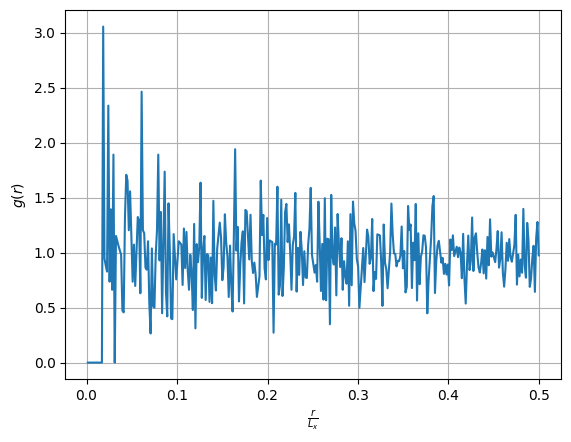

In [202]:
plt.figure(110)
plt.plot(R[R<Lx/2]/Lx,g_rand_seq[R<Lx/2])
plt.grid()
plt.ylabel(r'$g\left(r\right)$')
plt.xlabel(r'$\frac{r}{L_x}$')
plt.show()

In [207]:
M=20
g_rand_seq_smooth = np.zeros_like(R)
for i in range(M):
    print(i)
    X_rand_seq=random_seq_x(Lx,Ly,N,0.35)
    g_rand_seq = g(X_rand_seq,R,Lx,Ly)
    g_rand_seq_smooth += g_rand_seq
g_rand_seq_smooth /= M

0


/tmp/ipykernel_25290/4150231984.py:39: RuntimeWarning: divide by zero encountered in divide
  g_normalized = g / N_reference / (2*np.pi*R*dr) / (N/(Lx*Ly))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


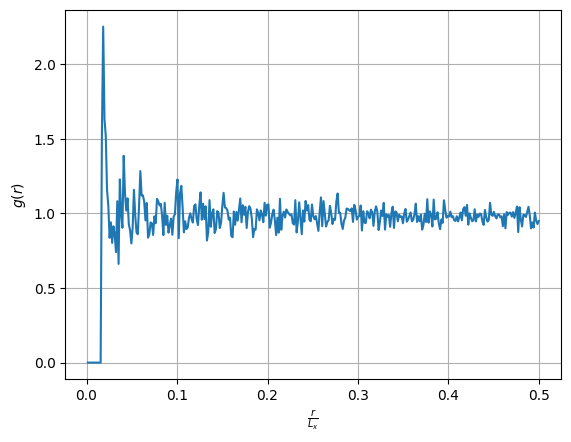

In [351]:
plt.figure(130)
plt.plot(R[R<Lx/2]/Lx,g_rand_seq_smooth[R<Lx/2],label=r"$g\left(r\right)$")
# plt.axvline(0.35/Lx,label=r"$\frac{R}{L_x}$")
plt.grid()
# plt.legend()
plt.ylabel(r'$g\left(r\right)$')
plt.xlabel(r'$\frac{r}{L_x}$')
plt.savefig('plots/g_smooth_rand_seq.png',bbox_inches='tight')
plt.show()

## Ordered Particles

In [387]:
Lx=20
Ly=20
N=150
np.random.seed(42)

In [307]:
X_ordered=ordered_x(Lx,Ly,N)

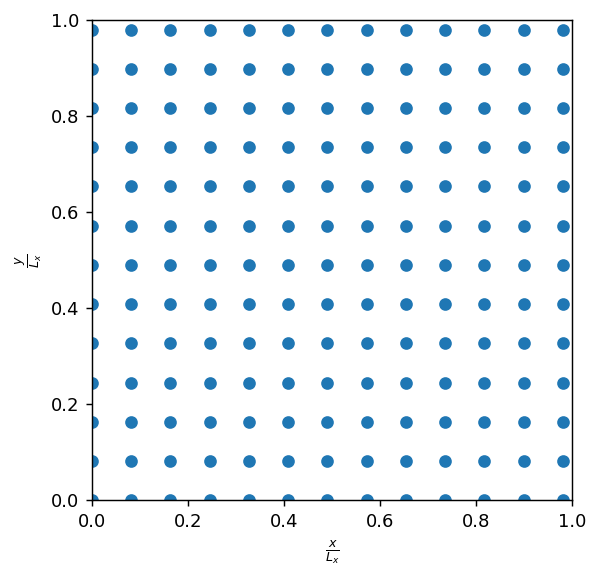

In [389]:
plt.figure(dpi=130)
plt.scatter(X_ordered[0,:]/Lx,X_ordered[1,:]/Lx)
plt.xlim((0,1))
plt.ylim((0,Ly/Lx))
plt.xlabel(r'$\frac{x}{L_x}$')
plt.ylabel(r'$\frac{y}{L_x}$')
plt.gca().set_aspect('equal')
plt.savefig('plots/config_ordered.png',bbox_inches='tight')
plt.show()

In [390]:
bins_grid = int(L/(np.sqrt(Lx*Ly/N)/60))
R_ordered=np.linspace(0,L,bins_grid)

In [395]:
(R_ordered[1]-R_ordered[0])/Lx

0.0013624408115347738

In [391]:
g_ordered = g(X_ordered,R_ordered,Lx,Ly)

/tmp/ipykernel_25290/4150231984.py:39: RuntimeWarning: divide by zero encountered in divide
  g_normalized = g / N_reference / (2*np.pi*R*dr) / (N/(Lx*Ly))


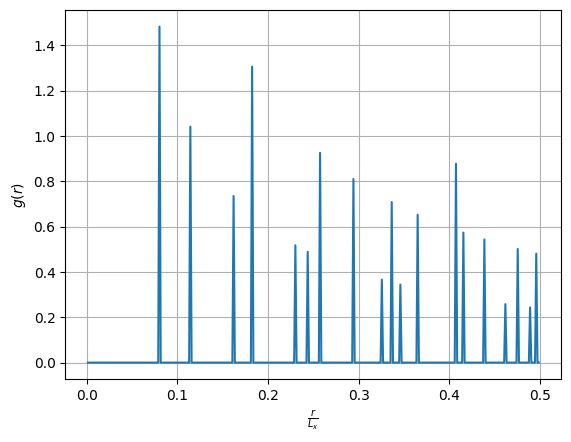

In [393]:
plt.figure(130)
plt.plot(R_ordered[R_ordered<Lx/2]/Lx,g_ordered[R_ordered<Lx/2]/Lx)
plt.grid()
plt.ylabel(r'$g\left(r\right)$')
plt.xlabel(r'$\frac{r}{L_x}$')
plt.savefig('plots/g_ordered.png',bbox_inches='tight')
plt.show()